In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import nltk
from nltk.corpus import stopwords

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HOME\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
train_df = pd.read_csv(r"F:\PFW_CS_Course\Semester 2\dual-stage-toxic-comment-detection-system\raw_data\jigsaw-toxic-comment-classification-challenge\train\train.csv")
test_df = pd.read_csv(r"F:\PFW_CS_Course\Semester 2\dual-stage-toxic-comment-detection-system\raw_data\jigsaw-toxic-comment-classification-challenge\test\test.csv")

In [5]:
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
sum_labels=train_df.iloc[:,2:].sum()
print(sum_labels)

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64


In [7]:
row_sum=train_df.iloc[:,2:].sum(axis=1)
train_df['Label']=(row_sum==0)

In [8]:
print(train_df.isnull().sum())

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
Label            0
dtype: int64


In [49]:
print(train_df[train_df['Label'] == False])

                      id                                       comment_text  \
6       0002bcb3da6cb337       COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK   
12      0005c987bdfc9d4b  Hey... what is it..\n@ | talk .\nWhat is it......   
16      0007e25b2121310b  Bye! \n\nDon't look, come or think of comming ...   
42      001810bf8c45bf5f  You are gay or antisemmitian? \n\nArchangel WH...   
43      00190820581d90ce           FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!   
...                  ...                                                ...   
159494  fef4cf7ba0012866  "\n\n our previous conversation \n\nyou fuckin...   
159514  ff39a2895fc3b40e                  YOU ARE A MISCHIEVIOUS PUBIC HAIR   
159541  ffa33d3122b599d6  Your absurd edits \n\nYour absurd edits on gre...   
159546  ffb47123b2d82762  "\n\nHey listen don't you ever!!!! Delete my e...   
159554  ffbdbb0483ed0841  and i'm going to keep posting the stuff u dele...   

        toxic  severe_toxic  obscene  threat  insul

In [9]:
print(test_df.isnull().sum())

id              0
comment_text    0
dtype: int64


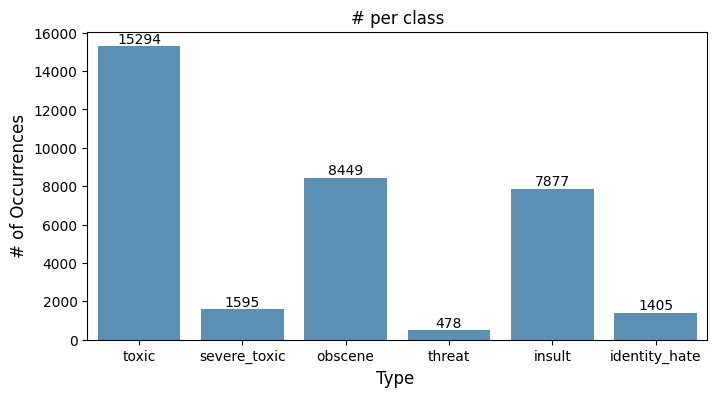

In [10]:
#plot
plt.figure(figsize=(8,4))
ax = sns.barplot(x=sum_labels.index, y=sum_labels.values, alpha=0.8)
plt.title("# per class")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)
#adding the text labels
rects = ax.patches
labels = sum_labels.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

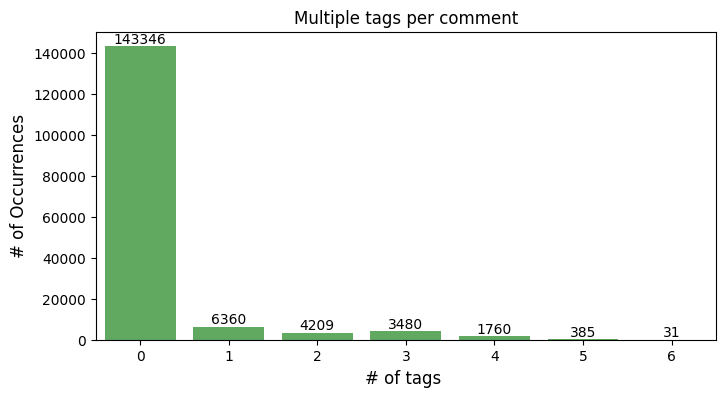

In [11]:
color = sns.color_palette()

x=row_sum.value_counts()

#plot
plt.figure(figsize=(8,4))
ax = sns.barplot(x=x.index, y=x.values, alpha=0.8,color=color[2])
plt.title("Multiple tags per comment")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of tags ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [12]:
temp_df=train_df.iloc[:,2:-1]

# https://pandas.pydata.org/pandas-docs/stable/style.html
def highlight_min(data, color='yellow'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_min = data == data.min()
        return [attr if v else '' for v in is_min]
    else:  # from .apply(axis=None)
        is_max = data == data.min().min()
        return pd.DataFrame(np.where(is_min, attr, ''),
                            index=data.index, columns=data.columns)
        
#Crosstab
# Since technically a crosstab between all 6 classes is impossible to vizualize, lets take a 
# look at toxic with other tags
main_col="toxic"
corr_mats=[]
for other_col in temp_df.columns[1:]:
    confusion_matrix = pd.crosstab(temp_df[main_col], temp_df[other_col])
    corr_mats.append(confusion_matrix)
out = pd.concat(corr_mats,axis=1,keys=temp_df.columns[1:])

#cell highlighting
out = out.style.apply(highlight_min,axis=0)
out

In [13]:
stopwords = set(stopwords.words('english'))

In [14]:
combined_df = pd.concat([train_df.iloc[:, :2], test_df.iloc[:, :2]], axis=0)
df = combined_df.reset_index(drop=True)

In [51]:
print(combined_df)

                      id                                       comment_text
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...
...                  ...                                                ...
153159  fffcd0960ee309b5  . \n i totally agree, this stuff is nothing bu...
153160  fffd7a9a6eb32c16  == Throw from out field to home plate. == \n\n...
153161  fffda9e8d6fafa9e  " \n\n == Okinotorishima categories == \n\n I ...
153162  fffe8f1340a79fc2  " \n\n == ""One of the founding nations of the...
153163  ffffce3fb183ee80  " \n :::Stop already. Your bullshit is not wel...

[312735 rows x 2 columns]


In [52]:
print(df)

                      id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
312730  fffcd0960ee309b5  . \n i totally agree, this stuff is nothing bu...   
312731  fffd7a9a6eb32c16  == Throw from out field to home plate. == \n\n...   
312732  fffda9e8d6fafa9e  " \n\n == Okinotorishima categories == \n\n I ...   
312733  fffe8f1340a79fc2  " \n\n == ""One of the founding nations of the...   
312734  ffffce3fb183ee80  " \n :::Stop already. Your bullshit is not wel...   

        sentence_count  word_count  unique_word_cou

In [15]:
import string

In [16]:
# Indirect Textual Features

# Count sentences based on newline characters in each comment
df['sentence_count'] = df['comment_text'].apply(lambda text: str(text).count('\n') + 1)

# Count total words in each comment
df['word_count'] = df['comment_text'].apply(lambda text: len(str(text).split()))

# Count unique words in each comment
df['unique_word_count'] = df['comment_text'].apply(lambda text: len(set(str(text).split())))

# Count total letters (characters) in each comment
df['letter_count'] = df['comment_text'].apply(lambda text: len(str(text)))

# Count punctuation marks in each comment
df['punctuation_count'] = df['comment_text'].apply(
    lambda text: sum(1 for char in str(text) if char in string.punctuation)
)

# Count uppercase words in each comment
df['uppercase_word_count'] = df['comment_text'].apply(
    lambda text: sum(1 for word in str(text).split() if word.isupper())
)

# Count title-case words in each comment
df['titlecase_word_count'] = df['comment_text'].apply(
    lambda text: sum(1 for word in str(text).split() if word.istitle())
)

# Count stopwords in each comment
df['stopword_count'] = df['comment_text'].apply(
    lambda text: sum(1 for word in str(text).lower().split() if word in stopwords)
)

# Calculate average word length in each comment
df['avg_word_length'] = df['comment_text'].apply(
    lambda text: np.mean([len(word) for word in str(text).split()]) if text else 0
)

c:\Users\HOME\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\HOME\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [17]:
print(df)

                      id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
312730  fffcd0960ee309b5  . \n i totally agree, this stuff is nothing bu...   
312731  fffd7a9a6eb32c16  == Throw from out field to home plate. == \n\n...   
312732  fffda9e8d6fafa9e  " \n\n == Okinotorishima categories == \n\n I ...   
312733  fffe8f1340a79fc2  " \n\n == ""One of the founding nations of the...   
312734  ffffce3fb183ee80  " \n :::Stop already. Your bullshit is not wel...   

        sentence_count  word_count  unique_word_cou

In [18]:
# Calculating the percentage of unique words per comment
df['unique_word_ratio'] = (df['unique_word_count'] / df['word_count']) * 100

# Calculating the percentage of punctuation marks per comment
df['punctuation_ratio'] = (df['punctuation_count'] / df['word_count']) * 100


In [55]:
# Splitting dataset into training and testing feature sets
train_data_features = df[:train_df.shape[0]].reset_index(drop=True)
test_data_features = df[train_df.shape[0]:].reset_index(drop=True)

print(train_data_features)

                      id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        sentence_count  word_count  unique_word_cou

In [ ]:
print(test_data_features)

                      id                                       comment_text  \
0       00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...   
1       0000247867823ef7  == From RfC == \n\n The title is fine as it is...   
2       00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...   
3       00017563c3f7919a  :If you have a look back at the source, the in...   
4       00017695ad8997eb          I don't anonymously edit articles at all.   
...                  ...                                                ...   
153159  fffcd0960ee309b5  . \n i totally agree, this stuff is nothing bu...   
153160  fffd7a9a6eb32c16  == Throw from out field to home plate. == \n\n...   
153161  fffda9e8d6fafa9e  " \n\n == Okinotorishima categories == \n\n I ...   
153162  fffe8f1340a79fc2  " \n\n == ""One of the founding nations of the...   
153163  ffffce3fb183ee80  " \n :::Stop already. Your bullshit is not wel...   

        sentence_count  word_count  unique_word_cou

In [57]:
# Extracting labels from the training data
label_columns = train_df.iloc[:, 2:].reset_index(drop=True)

print(label_columns)

# Combining training features and labels into a single DataFrame
combined_training_data = pd.concat([train_data_features, label_columns], axis=1)

        toxic  severe_toxic  obscene  threat  insult  identity_hate  Label  \
0           0             0        0       0       0              0   True   
1           0             0        0       0       0              0   True   
2           0             0        0       0       0              0   True   
3           0             0        0       0       0              0   True   
4           0             0        0       0       0              0   True   
...       ...           ...      ...     ...     ...            ...    ...   
159566      0             0        0       0       0              0   True   
159567      0             0        0       0       0              0   True   
159568      0             0        0       0       0              0   True   
159569      0             0        0       0       0              0   True   
159570      0             0        0       0       0              0   True   

                                            clean_comment  
0  

In [58]:
print(combined_training_data)

                      id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        sentence_count  word_count  unique_word_cou

In [24]:
import re

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stopwords])
    return text

# Apply preprocessing
train_df['clean_comment'] = train_df['comment_text'].apply(preprocess_text)
test_df['clean_comment'] = test_df['comment_text'].apply(preprocess_text)

In [ ]:
# Extract features and labels
X = train_df["clean_comment"]
y = train_df["toxic"]  # Binary classification (toxic vs. non-toxic)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [33]:
# Convert text data into numerical vectors using TF-IDF
tfidf = TfidfVectorizer(max_features=15000, stop_words="english")
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)

In [30]:
# Train a Logistic Regression model for binary classification
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [34]:
# Predict on the validation set
y_pred = model.predict(X_val_tfidf)

In [35]:
# Evaluate model performance
accuracy = accuracy_score(y_val, y_pred)
classification_rep = classification_report(y_val, y_pred)

In [37]:
print(accuracy)

0.95729280902397


In [38]:
print(classification_rep)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     28856
           1       0.92      0.61      0.73      3059

    accuracy                           0.96     31915
   macro avg       0.94      0.80      0.85     31915
weighted avg       0.96      0.96      0.95     31915



In [39]:
# Apply preprocessing to the test dataset
test_df["clean_comment"] = test_df["comment_text"].astype(str).apply(preprocess_text)

# Transform test data using the same TF-IDF vectorizer
X_test_tfidf = tfidf.transform(test_df["clean_comment"])

# Predict using the trained Logistic Regression model
test_predictions = model.predict(X_test_tfidf)

In [40]:
# Merge predictions with test labels for evaluation
test_df["predicted_toxic"] = test_predictions

In [47]:
print(test_df)

                      id                                       comment_text  \
0       00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...   
1       0000247867823ef7  == From RfC == \n\n The title is fine as it is...   
2       00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...   
3       00017563c3f7919a  :If you have a look back at the source, the in...   
4       00017695ad8997eb          I don't anonymously edit articles at all.   
...                  ...                                                ...   
153159  fffcd0960ee309b5  . \n i totally agree, this stuff is nothing bu...   
153160  fffd7a9a6eb32c16  == Throw from out field to home plate. == \n\n...   
153161  fffda9e8d6fafa9e  " \n\n == Okinotorishima categories == \n\n I ...   
153162  fffe8f1340a79fc2  " \n\n == ""One of the founding nations of the...   
153163  ffffce3fb183ee80  " \n :::Stop already. Your bullshit is not wel...   

                                            clean_c